In [1]:
using QuantumOptics
using Plots

In [2]:
using Random; Random.seed!(0)
η = 0.9 # Pumping strength
κ = 1 # Decay rate

Ncutoff = 20 # Maximum photon number
T = [0:0.1:10;]
basis = FockBasis(2)
a = destroy(basis)
at = create(basis)
n = number(basis)
H =  (a*at) - (at*a)
J = [sqrt(κ)*a]
0


0

In [38]:
Ψ₀ = fockstate(basis, 1)
ρ₀ = Ψ₀ ⊗ dagger(Ψ₀)
0

0

In [39]:
tout, ρt_master = timeevolution.master(T, ρ₀, H, J)
0

0

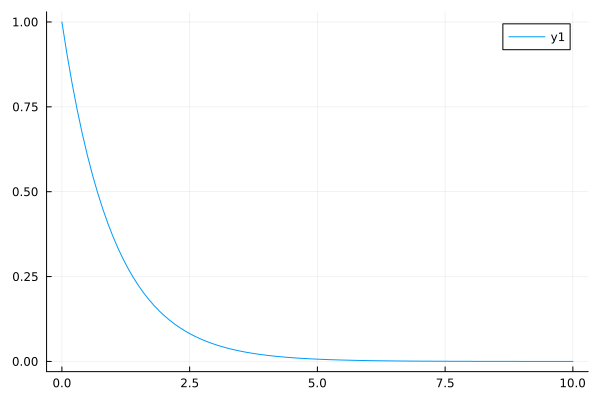

In [40]:
plot(T, real(expect(n, ρt_master)))



#xlim(0, 10)
#ylim(0, 10)
#xlabel(L"\mathrm{Time}")
#ylabel(L"\mathrm{Photon number}")

In [122]:
timecorrelations.correlation(T, ρt_master[60], H, J, at, a)

101-element Vector{ComplexF64}:
 0.0027394503956062015 + 0.0im
   0.00260584575977061 + 1.3767174049090617e-19im
  0.002478757038489058 + 2.718934818241009e-19im
 0.0023578667307217185 + 3.379272073970697e-19im
 0.0022428723122785354 + 3.8093958647221076e-19im
 0.0021334857624881786 + 4.494871199457903e-19im
  0.002029434089508881 + 4.938166711333397e-19im
  0.001930457607300678 + 5.337446587233437e-19im
 0.0018363085044232994 + 5.817238604600947e-19im
  0.001746750816034458 + 6.416592687475476e-19im
                       ⋮
 2.7539675383737795e-5 + 1.1405434825752365e-19im
 2.6196522821666004e-5 + 1.0961923790848179e-19im
 2.4918846376892323e-5 + 1.0525055743614224e-19im
 2.3703499719102744e-5 + 1.0112288592398476e-19im
 2.2547461804562225e-5 + 9.732738978182961e-20im
 2.1447838975680757e-5 + 9.387203251543477e-20im
 2.0401864961013336e-5 + 9.068157472649586e-20im
 1.9406900875260028e-5 + 8.759757411264643e-20im
 1.8460435219265882e-5 + 8.437838546745752e-20im

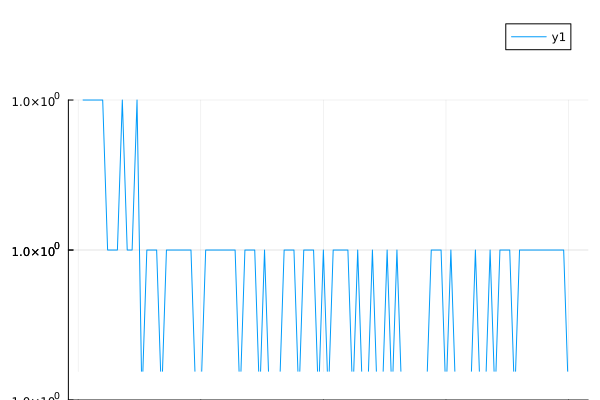

In [50]:
plot(real(expect(H, ρt_master)))

In [54]:
ρt_master[90]

Operator(dim=3x3)
  basis: Fock(cutoff=2)
 0.999864+0.0im          0.0+0.0im  0.0+0.0im
      0.0+0.0im  0.000136391+0.0im  0.0+0.0im
      0.0+0.0im          0.0+0.0im  0.0+0.0im

In [188]:
corel_m = Array{Float64}(undef, 101, 101)
corel_m .*= 0

101×101 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …    0.0  NaN      0.0  NaN      0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0  NaN      0.0    0.0    0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     NaN    NaN      0.0    0.0    0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0    0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0    0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …    0.0    0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0    0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0  NaN      0.0    0.0    0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0    0.0    0.0  NaN      0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0    0.0    0.0  NaN      0.0
 ⋮                        ⋮              ⋱                                ⋮
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0    0.0    0.0    0.0  NaN
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    

In [172]:
tau_list = [0:0.1:10;]

101-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  ⋮
  9.2
  9.3
  9.4
  9.5
  9.6
  9.7
  9.8
  9.9
 10.0

In [193]:
A = [[1,2,4,3],[3,4,2,4]]

2-element Vector{Vector{Int64}}:
 [1, 2, 4, 3]
 [3, 4, 2, 4]

In [194]:
A[1,:] .= [4,5,6,7]

DimensionMismatch: DimensionMismatch: array could not be broadcast to match destination

In [174]:
size(corel_m)

(0,)

In [178]:
for i=1:length(ρt_master)
    rhot = ρt_master[i]
    corel_m[i,:] = timecorrelations.correlation(T, rhot, H, J, at, a) 
    #timecorrelations.correlation(T, rhot , H, J, at, a)
end

In [182]:
size(timecorrelations.correlation(T,  ρt_master[10], H, J, at, a))

(101,)

In [185]:
([8,8,9])

3-element Vector{Int64}:
 8
 8
 9

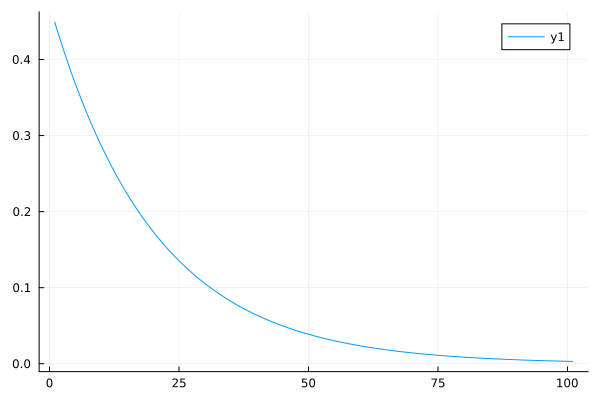

In [111]:
plot(real(corel_m[9]))

In [109]:
imag(corel_m[4]) < repeat([0.000000001,], 101)

true